# ORDINARY DIFFERENTIAL EQUATIONS

## RK-4 (Single Variable)

In [74]:
# import statements
import numpy as np
from numpy import e
import matplotlib.pyplot as plt
from scipy.signal.windows import cosine

In [ ]:
def f(x : np.float64,y : np.float64) -> np.float64:
    return -2*y

In [ ]:
def actual_f(x):
    return e**(-2*x)

In [ ]:
def RK4(function , xn : np.float64, yn: np.float64, h:np.float64) -> np.float64:
    k1 = function(xn,yn)
    k2 = function(xn+h/2, yn+h*k1/2)
    k3 = function(xn+h/2, yn+h*k2/2)
    k4 = function(xn+h, yn+h*k3)
    y = yn + h*(k1+2*k2+2*k3+k4)/6
    return y

In [ ]:
def value_calc(func, x0 : np.float64 = 0, y0 : np.float64 = 0, h : np.float64 = 0, xf : np.float64 = 1) :
    n = np.int_(np.ceil((xf-x0)/h))
    x_arr = np.zeros(n)
    y_arr = np.zeros(n)
    actual_vals = np.zeros(n)
    x_arr[0] = x0
    y_arr[0] = y0
    actual_vals[0] = y0
    for x in range(1,n) :
        x_arr[x] = x_arr[x-1] + h
        y_arr[x] = RK4(f, x_arr[x-1],y_arr[x-1], h)
        actual_vals[x] = actual_f(x_arr[x])
    print("x_arr =",x_arr)
    #print("y_arr =",y_arr)
    #print("actual_vals =",actual_vals)
    print("Errors: ", actual_vals-y_arr)
    #plt.plot(x_arr,y_arr)
    plt.plot(x_arr,actual_vals - y_arr)


x_arr = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Errors:  [ 0.00000000e+00 -2.58025535e-06 -4.22507547e-06 -5.18880701e-06
 -5.66432342e-06 -5.79695386e-06 -5.69538225e-06 -5.44015727e-06
 -5.09032123e-06 -4.68856024e-06]
x_arr = [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Errors:  [ 0.00000000e+00 -2.65780731e-11 -5.21035437e-11 -7.66077202e-11
 -1.00121023e-10 -1.22673094e-10 -1.44292800e-10 -1.65008118e-10
 -1.84846582e-10 -2.03834727e-10 -2.21998309e-10 -2.39362752e-10
 -2.55952370e-10 -2.71791145e-10 -2.86902391e-10 -3.0130

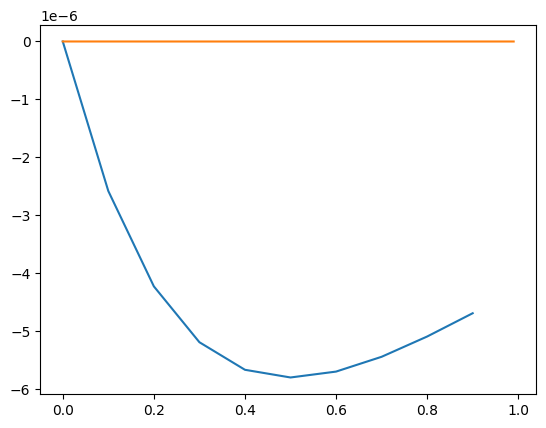

In [90]:
value_calc(f,x0=0,y0=1,h=0.1,xf=1)
value_calc(f,x0=0,y0=1,h=0.01,xf=1)

## RK-4 (Coupled Differential Equation - Oscillator)

In [89]:
def cdf(t : np.float64,x : np.float64 ,y: np.float64) -> np.float64:
    return y

def cdl(t : np.float64,x : np.float64 ,y: np.float64, gamma : np.float64) -> np.float64:
    return -x - gamma*y

In [91]:
def second_Order_RK4(function_f, function_l , tn : np.float64, xn : np.float64, yn: np.float64, h:np.float64, gamma : np.float64) -> (np.float64, np.float64):
    k1 = function_f(tn, xn, yn)
    l1 = function_l(tn, xn, yn, gamma)
    k2 = function_f(tn + h/2, xn+h*k1/2, yn+h*l1/2)
    l2 = function_l(tn + h/2, xn+h*k1/2, yn+h*l1/2, gamma)
    k3 = function_f(tn + h/2, xn+h*k2/2, yn+h*l2/2)
    l3 = function_l(tn + h/2, xn+h*k2/2, yn+h*l2/2, gamma)
    k4 = function_f(tn + h, xn+h*k3, yn+h*l3)
    l4 = function_l(tn + h, xn+h*k3, yn+h*l3, gamma)
    x = xn + h*(k1+2*k2+2*k3+k4)/6
    y = yn + h*(l1+2*l2+2*l3+l4)/6
    return x,y

In [103]:
def value_calc_coupled_DE(func_x_prime, func_y_prime, t0 : np.float64 = 0 ,x0: np.float64 = 1, y0: np.float64 = 0, h: np.float64 = 0.1, tf: np.float64 = 100, F0 : np.float64 = 0, w : np.float64 = 0, gamma : np.float64 = 0) -> np.float64 :
    n = np.int_(np.ceil((tf - t0) / h))
    x_arr = np.zeros(n)
    y_arr = np.zeros(n)
    x_arr[0] = x0
    y_arr[0] = y0
    for t in range(1, n):
        x_arr[t], y_arr[t] = second_Order_RK4(func_x_prime, func_y_prime, t, x_arr[t-1], y_arr[t-1], h, gamma)
        x_arr[t] += F0 * np.cos(w*t)
    print("x_arr =", x_arr.shape)
    print("y_arr =", y_arr.shape)

    plt.figure(figsize=(6, 6))
    plt.plot(x_arr, y_arr)
    plt.title("Phase Portrait (y vs x)")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()
    return x_arr

x_arr = (1000,)
y_arr = (1000,)


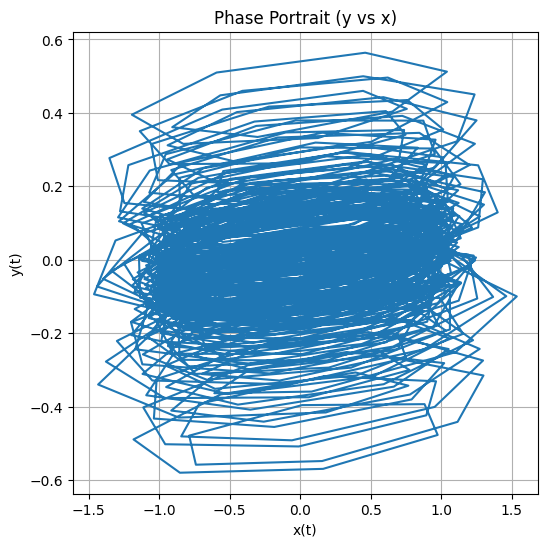

In [104]:
x_vals = value_calc_coupled_DE(cdf, cdl, F0 = 1, gamma=0.05, w = 1)

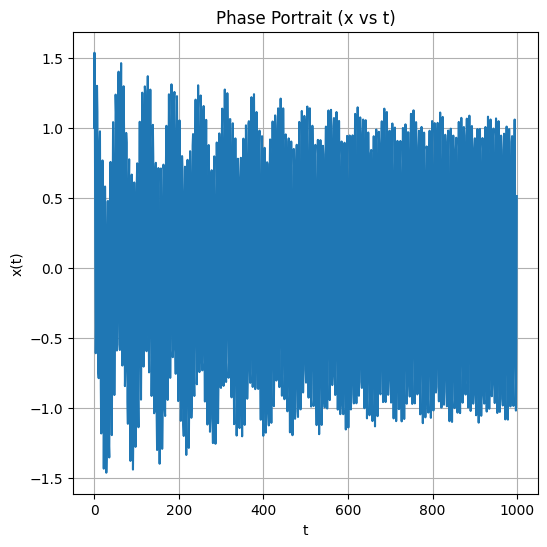

In [101]:
def plot_x(x_vals):
    plt.figure(figsize=(6, 6))
    plt.plot(x_vals)
    plt.title("Phase Portrait (x vs t)")
    plt.ylabel("x(t)")
    plt.xlabel("t")
    plt.grid(True)
    plt.show()

plot_x(x_vals)